In [1]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.linear_model import SGDClassifier
import numpy as np
import pandas as pd
import nltk
from nltk import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from scipy.sparse import coo_matrix, hstack

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('/content/drive/MyDrive/PAWS_train.tsv',sep='\t',engine='python')
train = train.drop(columns=['id'])
test = pd.read_csv('/content/drive/MyDrive/PAWS_test.tsv',sep='\t',engine='python')
test = test.drop(columns=['id'])
test

,sentence1,sentence2,label
0,This was a series of nested angular standards ...,"This was a series of nested polar scales , so ...",0
1,His father emigrated to Missouri in 1868 but r...,"His father emigrated to America in 1868 , but ...",0
2,"In January 2011 , the Deputy Secretary General...","In January 2011 , FIBA Asia deputy secretary g...",1
3,"Steiner argued that , in the right circumstanc...",Steiner held that the spiritual world can be r...,0
4,"Luciano Williames Dias ( born July 25 , 1970 )...",Luciano Williames Dias ( born 25 July 1970 ) i...,0
...,...,...,...
7995,"The company has branches in Tokyo , based in t...",The company has branches in Tokyo based in Sai...,1
7996,Muara Teweh ( abbreviated : MTW ) is a city lo...,Teweh ( abbreviated : MTW ) is a city located ...,0
7997,The modern coat of arms of Bavaria was designe...,The modern coat of arms of Bavaria was designe...,1
7998,"Former President , Brenda Kuecks , received a ...","In 2013 , former President Brenda Kuecks recei...",0


In [13]:
train

,sentence1,sentence2,label
0,"In Paris , in October 1560 , he secretly met t...","In October 1560 , he secretly met with the Eng...",0
1,The NBA season of 1975 -- 76 was the 30th seas...,The 1975 -- 76 season of the National Basketba...,1
2,"There are also specific discussions , public p...","There are also public discussions , profile sp...",0
3,When comparable rates of flow can be maintaine...,The results are high when comparable flow rate...,1
4,It is the seat of Zerendi District in Akmola R...,It is the seat of the district of Zerendi in A...,1
...,...,...,...
49396,"`` Our school is of spiritual and spiritual , ...",`` Our School is of the Temporal and the Spiri...,0
49397,She was in Cork on June 24 and arrived on 8 Ju...,"She was at Cork on 24 June , and arrived in th...",1
49398,Cornelia Stuyvesant Vanderbilt ( George and Ed...,John John F. A. Cecil ( the only child of Geor...,0
49399,The third season was premiered on 7 June 2010 ...,"The fourth season was premiered on June 7 , 20...",0


In [4]:
train_y = train.iloc[:,2]
test_y = test.iloc[:,2]

In [5]:
train_X = [train.iloc[:,0],train.iloc[:,1]]
train_X = np.array(train_X)
train_X = np.reshape(train_X,(1,-1))
train_X

array([['In Paris , in October 1560 , he secretly met the English ambassador , Nicolas Throckmorton , asking him for a passport to return to England through Scotland .',
        'The NBA season of 1975 -- 76 was the 30th season of the National Basketball Association .',
        'There are also specific discussions , public profile debates and project discussions .',
        ...,
        'John John F. A. Cecil ( the only child of George and Cornelia Stuyvesant Vanderbilt ) married the British aristocrat William Cecil , a descendant of Edith Vanderbilt in 1924 .',
        'The fourth season was premiered on June 7 , 2010 . Like the third season the system of the competition was in mixed couples .',
        'It is also known from one location on the mainland California coast at the Portuguese Bend Nature Preserve , on the Palos Verdes Peninsula of Los Angeles County .']],
      dtype=object)

In [6]:
def porter_stemmer(corpus):
    tokenizer = RegexpTokenizer(r'\w+')
    ps = PorterStemmer()
    tokens = [ps.stem(token) for token in tokenizer.tokenize(corpus)]
    return tokens

In [10]:
cv = CountVectorizer(ngram_range=(1, 17))
X = cv.fit_transform(train_X.ravel())
X1 = X[0:49401,:]

X2 = X[49401:,:]

X = hstack([X1,X2])
lr = LogisticRegression(max_iter=2000)
lr.fit(X, train_y)
test_X = [test.iloc[:,0],test.iloc[:,1]]
test_X = np.array(test_X)
test_X = np.reshape(test_X,(1,-1))
T = cv.transform(test_X.ravel())
print(T.shape)

T1 = T[0:8000,:]
T2 = T[8000:,:]
T = hstack([T1,T2])
print(T.shape)

predictions = lr.predict(T)
print(predictions)
accuracy = np.mean(predictions == test_y)
print('accuracy = ' + str(accuracy))

(16000, 3999099)
(8000, 7998198)
[0 0 0 ... 0 0 1]
accuracy = 0.561625


In [11]:
#17
TP = 0
FP = 0
FN = 0
incorrect = []
for i in range(8000):
  if predictions[i] != np.array(test_y)[i]:
    incorrect.append(i)
    if predictions[i]==0:
      FN = FN + 1
    else:
      FP = FP + 1
  elif predictions[i] == np.array(test_y)[i] ==1 :
    TP = TP + 1



precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = (2*precision*recall)/(precision+recall)

print('accuracy = ' + str(accuracy))
print('precision = ' + str(precision))
print('recall = ' + str(recall))
print('F1 = ' + str(F1))




incorrect_df = test.iloc[0:1,:] # start with a dummy


for i in range(len(incorrect)):
  
  incorrect_df=incorrect_df.append(test.iloc[incorrect[i]:incorrect[i]+1,:], ignore_index=True)
  

incorrect_df = incorrect_df.drop(0) # drop dummy
incorrect_df

accuracy = 0.561625
precision = 0.5068107092531705
recall = 0.30514705882352944
F1 = 0.3809355692850839


,sentence1,sentence2,label
1,"In January 2011 , the Deputy Secretary General...","In January 2011 , FIBA Asia deputy secretary g...",1
2,"Luciano Williames Dias ( born July 25 , 1970 )...",Luciano Williames Dias ( born 25 July 1970 ) i...,0
3,"During her sophomore , junior and senior summe...","During her second , junior and senior summers ...",1
4,The smallest number that can be represented in...,The smallest number that can be represented as...,0
5,"His father emigrated to Missouri in 1868 , but...",His father emigrated to Missouri in 1868 but r...,1
...,...,...,...
3503,"Watchorn died on 3 April 1882 , and Fisher won...","Watchorn died on 3 April 1882 , and Fisher com...",0
3504,Twice Sparrow sold the island twice to Thomas ...,Sparrow twice sold the island to Thomas Polloc...,1
3505,"She married Reinaldo Zamparelli in 1954 , livi...","In 1954 she married Reinaldo Zamparelli , live...",0
3506,The name in Tupi means `` insensitive stone ''...,"The name in Tupi means '' hard stone `` , '' i...",1


Quora Questions


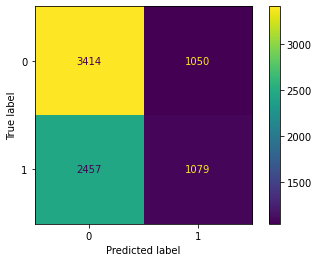

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
import matplotlib.pyplot as plt 
print("Quora Questions")
cm_quora=confusion_matrix(test_y,predictions)
disp_quora=ConfusionMatrixDisplay(confusion_matrix=cm_quora,display_labels=lr.classes_) 
disp_quora.plot() 
plt.show()